<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on SageMaker, Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  !pip install -q tf-nightly
except Exception:
  pass
import tensorflow_datasets as tfds
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

In [0]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [4]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [5]:
max(word_index.values())

30979

In [6]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
# TODO - your code!

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features + 1, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(46, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 128)         3965440   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 46)                2990      
Total params: 4,248,046
Trainable params: 4,248,046
Non-trainable params: 0
_________________________________________________________________


In [22]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/50
8982/8982 [==============================] - 16s 2ms/sample - loss: 2.3780 - accuracy: 0.3940 - val_loss: 1.8626 - val_accuracy: 0.5196
Epoch 2/50
8982/8982 [==============================] - 13s 1ms/sample - loss: 1.7792 - accuracy: 0.5405 - val_loss: 1.6217 - val_accuracy: 0.5864
Epoch 3/50
8982/8982 [==============================] - 13s 1ms/sample - loss: 1.5501 - accuracy: 0.5951 - val_loss: 1.5662 - val_accuracy: 0.5944
Epoch 4/50
8982/8982 [==============================] - 13s 1ms/sample - loss: 1.3765 - accuracy: 0.6393 - val_loss: 1.5571 - val_accuracy: 0.6046
Epoch 5/50
8982/8982 [==============================] - 13s 1ms/sample - loss: 1.2256 - accuracy: 0.6791 - val_loss: 1.4964 - val_accuracy: 0.6380
Epoch 6/50
8982/8982 [==============================] - 13s 1ms/sample - loss: 1.1085 - accuracy: 0.7147 - val_loss: 1.5568 - val_accuracy: 0.6126
Epoch 7/50
8982/8982 [==============================] - 13s 1

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Please add your answer in markdown here.

```
The input data is a numpy array of python lists ranging in shape from ~66 to 2200 I believe. In order for the model to work all the observations have to be the same shape. This is what `pad_sequences` is doing.
```

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Please add your answer in markdown here.

```
LSTM's help to remove the problems of vanishing and exploding gradient decent in RNN's. 
```

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Please add your answer in markdown here.

```
NLP - becuase language is serial, it's additive, it's dependent on the previous words, so being able to have that context means your models will do better

Stocks - becuase similarly the data is theoretically dependent on previous data

Speech recognition - same idea, similar sounds can have different meanings depending on the previous input
```


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [1]:
!pip install google_images_download

In [0]:
# from google_images_download import google_images_download

# response = google_images_download.googleimagesdownload()
# arguments = {"keywords": "lily frog pond", "limit": 5, "print_urls": True}
# absolute_image_paths = response.download(arguments)

In [0]:
import glob
files = glob.glob("./*.jpg")

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [0]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    prediction = model.predict(x)
    results = decode_predictions(prediction, top=5)[0]
    print(results)
    for entry in results:
        if "frog" in entry[1]:
            return entry[2]

    return "No Frog!"

In [0]:
from IPython.display import display, Image


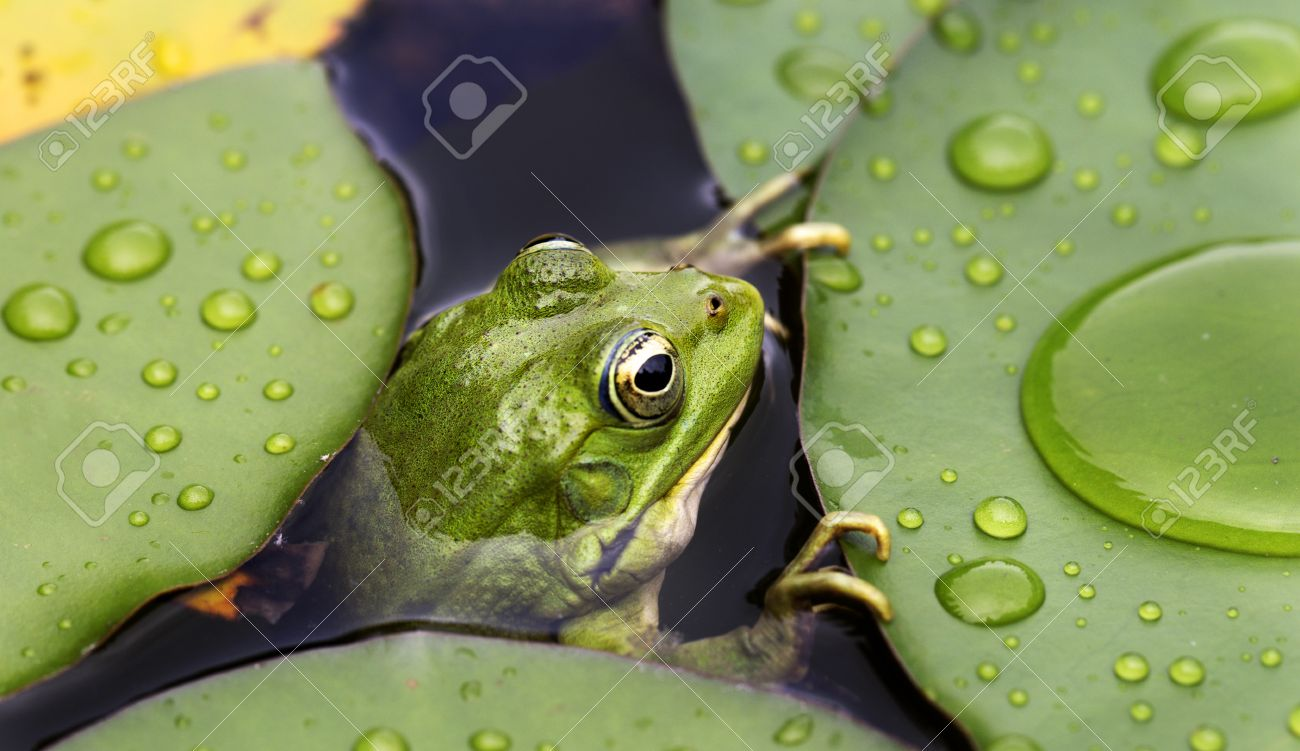

[('n01641577', 'bullfrog', 0.5327998), ('n01644373', 'tree_frog', 0.18524487), ('n07718472', 'cucumber', 0.15136647), ('n01644900', 'tailed_frog', 0.034965113), ('n07714571', 'head_cabbage', 0.02600868)]
0.5327998




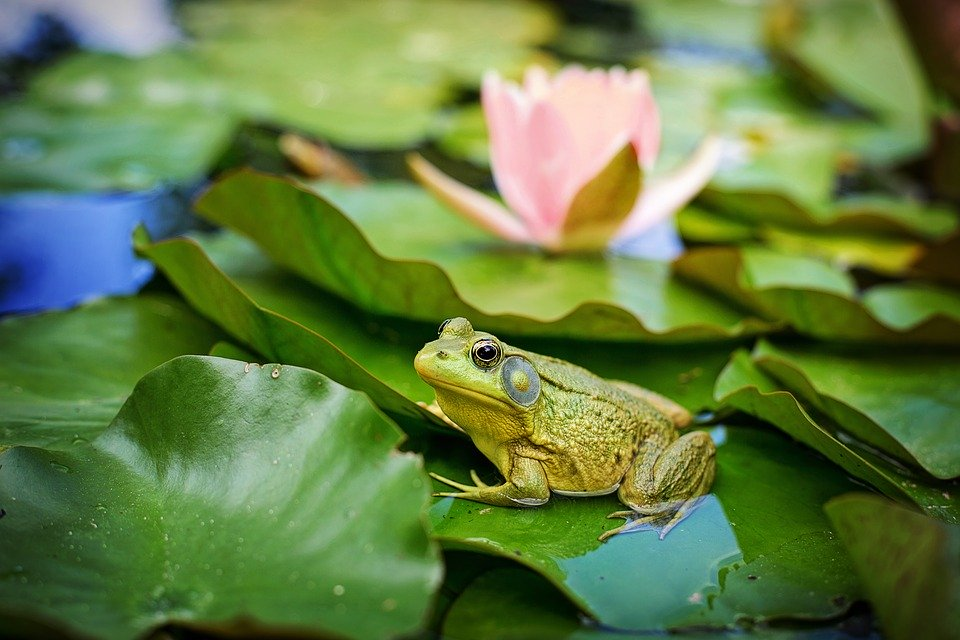

[('n01644373', 'tree_frog', 0.93951225), ('n01644900', 'tailed_frog', 0.036233876), ('n01641577', 'bullfrog', 0.018151537), ('n01693334', 'green_lizard', 0.0022560142), ('n01682714', 'American_chameleon', 0.0011199726)]
0.93951225




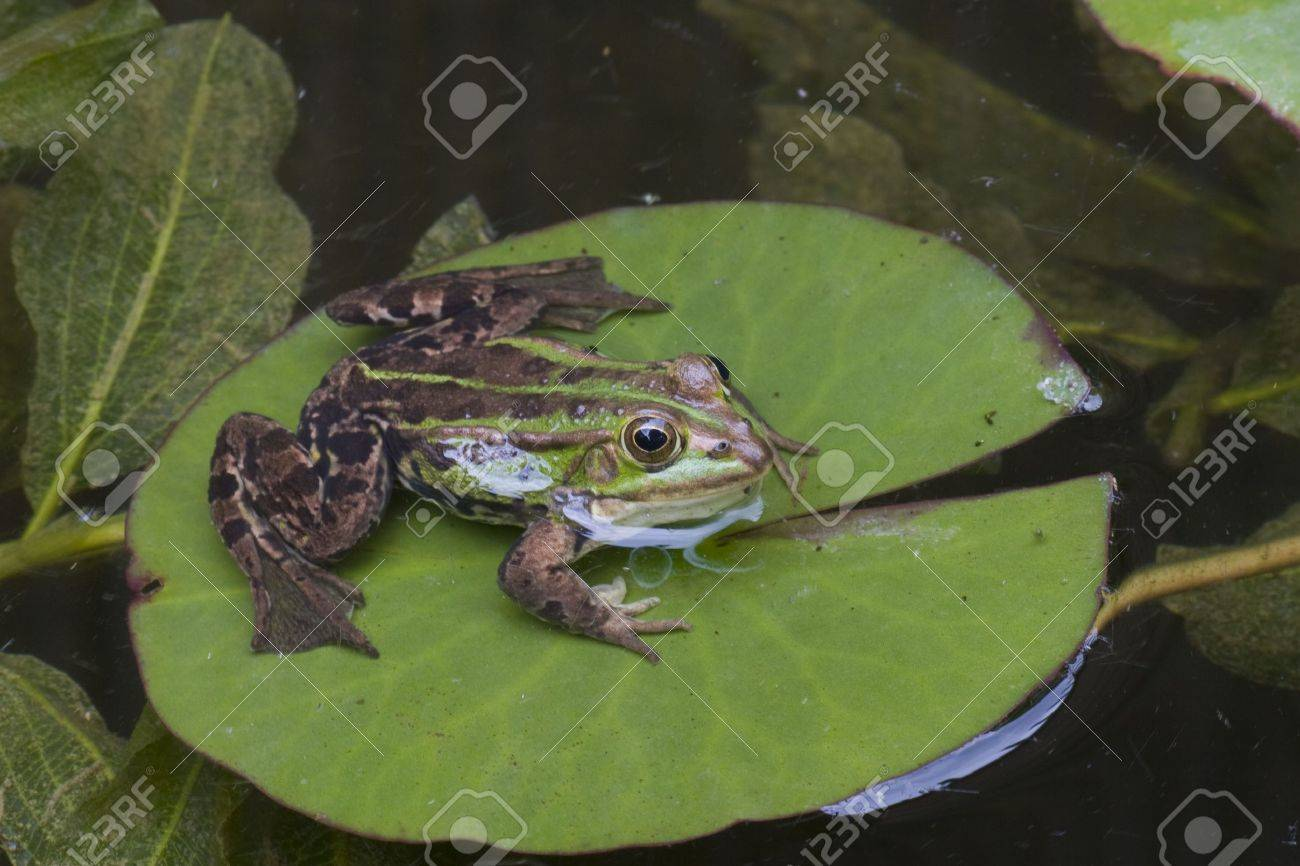

[('n01641577', 'bullfrog', 0.6200943), ('n01644900', 'tailed_frog', 0.3765972), ('n01644373', 'tree_frog', 0.0024667294), ('n01667778', 'terrapin', 0.00061381253), ('n01667114', 'mud_turtle', 0.00011519686)]
0.6200943




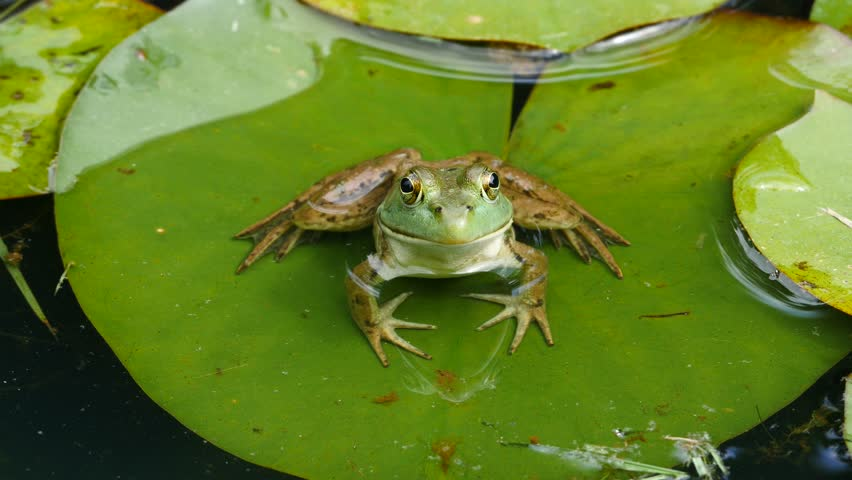

[('n01641577', 'bullfrog', 0.7273799), ('n01644900', 'tailed_frog', 0.20246865), ('n01644373', 'tree_frog', 0.06703478), ('n02259212', 'leafhopper', 0.0010981448), ('n01980166', 'fiddler_crab', 0.00090307754)]
0.7273799




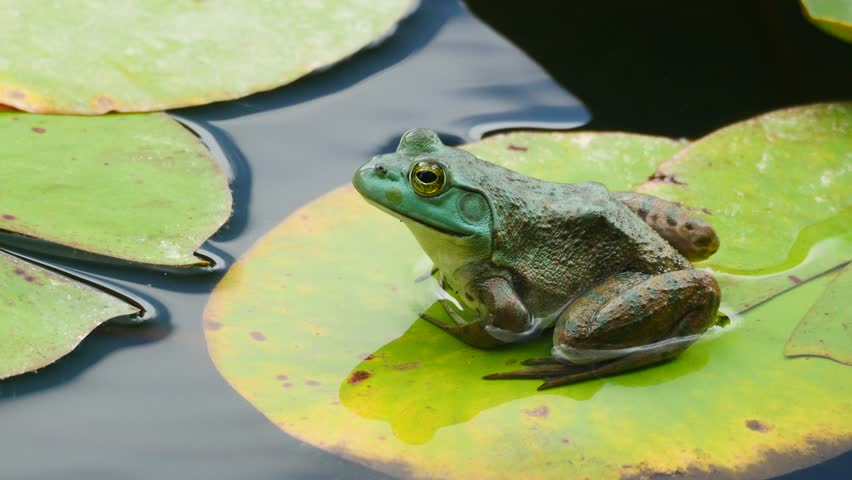

[('n01641577', 'bullfrog', 0.80265266), ('n01644373', 'tree_frog', 0.110339634), ('n01644900', 'tailed_frog', 0.085256144), ('n07742313', 'Granny_Smith', 0.00021289861), ('n07716358', 'zucchini', 0.0002098015)]
0.80265266




In [14]:
for file in files:
    display(Image(filename=file, width=600))
    print(img_contains_frog(process_img_path(file)))
    print("\n")

#### Stretch Goal: Displaying Predictions

In [0]:
import matplotlib.pyplot as plt



<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__

One potential use of Autoencoders is file compression, such as images, because the encoder section is reducing the dimensions of the data, and the decoder is reconstructing the data.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
    - I think my strongest area is my real world experience, outside of data science. Over the years I've accumulated a diverse set of skills and interest and so I believe I can bring a different perspective to the equation.
- What area of Data Science would you most like to learn more about, and why?
    - I am really interesting in so call "strong AI" or "general AI", the idea of an AI that is indistinguishable from a human. I think if we as a species can find a way to safely implement that, we can live in a truly post scarcity society and I think that will be good for everyone.
- Where do you think Data Science will be in 5 years?
    - I don't think anyone can really say. If I had to guess though, I think hardware might plateau, at least for the next couple of years. I think this will mean that people will have to get creative with their algorithms and looking for more efficient architectures, such as Transformers and Attention models.
- What are the threats posed by AI to our society?
    - I think AI is currently, and will likely almost always, be designed to make mistakes, but as minimal as possible, and so I think that we will try to apply machine learning to situations where mistakes are unacceptable, which will never be good.
- How do you think we can counteract those threats? 
    - Not be so reliant on AI, and accpet that life guarenteed to have mistakes and all we can do is learn from them.
- Do you think achieving General Artifical Intelligence is ever possible?
    - Obviously. I think if you look at nature, you'll see that "AI" is all around us. But I think it's going to take drastically new hardware. If you look at how much energy and heat current electronics use to accomplish what nature has been designed for (speech, vision, memory), compared to something like a fish or a bug, or a swarm of bugs or school of fish, you'll see that one scales and one doesn't. IMO
A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")